In [1]:
getRversion()

[1] '3.6.1'

In this notebook, we will try to demonstrate how the **Inverse Transform Sampling** method works. We start by creating an exponential distribution using samples generated from a standard uniform distribution.

$$
f_{exp}(x) = \lambda e^{-\lambda x} \\
\Rightarrow F_{exp}(x) = \int_{0}^{x}{f_{exp}(t)}dt = 1 - e^{\lambda x}
$$

Therefore

$$
F(F^{-1}(u)) = u \\
\Rightarrow F^{-1}(u) = \frac{-1}{\lambda} ln(1-u)
$$

Assuming $\lambda=1$ and a sample size of $n=1000$, we have the following code

In [2]:
# parameters
n <- 1000
lambda <- 1

# random variates (samples)
rvs.uniform <- runif(n)
rvs.custom.exp <- -1/lambda * log(1 - rvs.uniform)

We will now plot a histogram of our samples to visually confirm its similarity
to an exponential distribution

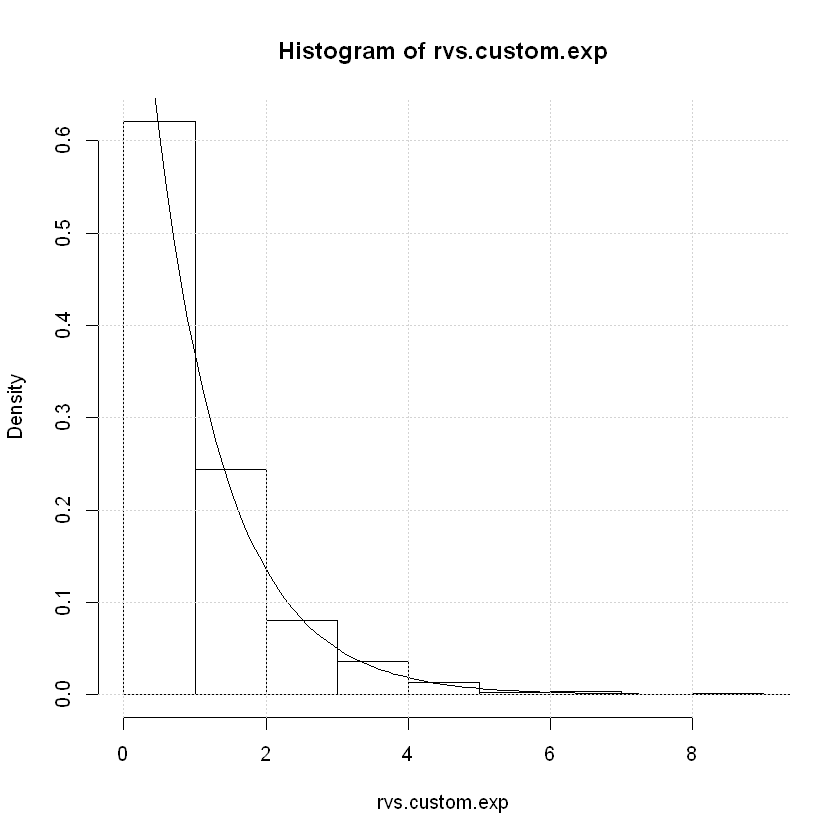

In [3]:
hist(rvs.custom.exp, probability = TRUE)

# actual probabilities from exp. dist.
samples <- seq(0, 10, .1)
lines(samples, dexp(samples))  # lambda = 1 by default

# add grid lines
grid()

We are going to repeat the same process but with $\lambda$ equaling the last digit of my student number. My number is $9723034$, therefore $\lambda = 4$.

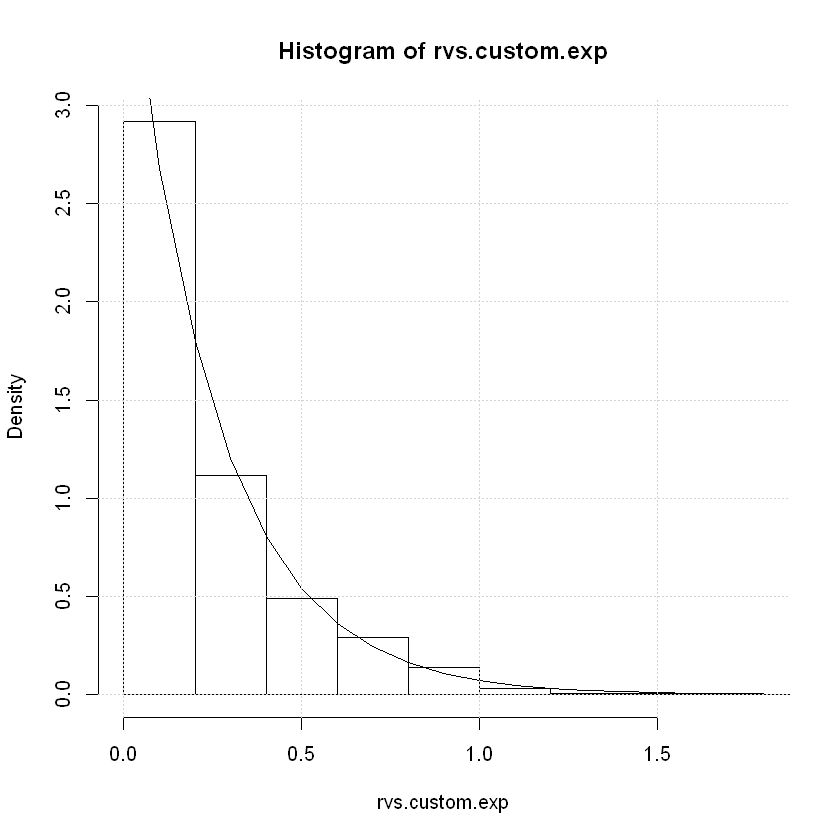

In [4]:
# parameters
n <- 1000
lambda <- 4

# random variates (samples)
rvs.uniform <- runif(n)
rvs.custom.exp <- -1/lambda * log(1 - rvs.uniform)

# plot histogram
hist(rvs.custom.exp, probability = TRUE)

# actual probabilities from exp. dist.
samples <- seq(0, 10, .1)
lines(samples, dexp(samples, rate = lambda))

# add grid lines
grid()

Now we are going to check the __Weak Law of Large Numbers__ for our generated samples.

The mean for exponential distribution is calculated as

$$
\mu=1/\lambda=1/4
$$

So if we calculate the mean of our generated samples, it should come in pretty close

In [5]:
samples.mean <- mean(rvs.custom.exp)
samples.mean

[1] 0.2387285

Which is pretty close to $0.25 = 1/4$.

Now we will define a custom function which will generate an arbitrary number of samples from our custom exponential distribution and calculate their mean. We will then use a plot to show the trend between these means.

In [6]:
calculate.rvs <- function(n) {
    rvs.uniform <- runif(n)
    
    lambda <- 4
    rvs.custom.exp <- -1/lambda * log(1 - rvs.uniform)

    return(rvs.custom.exp)
}

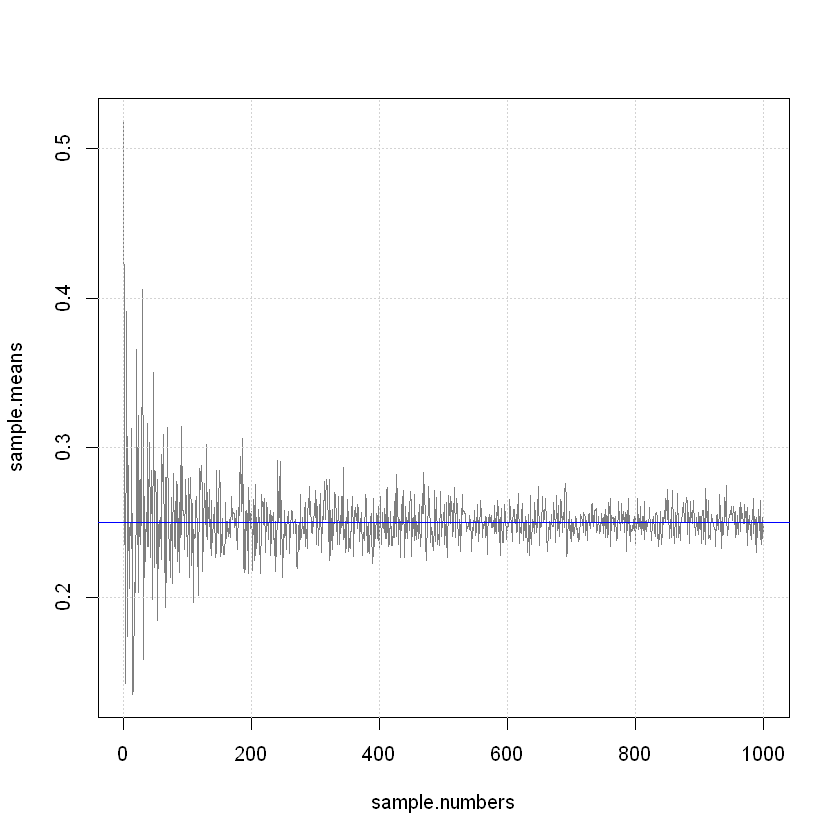

In [7]:
sample.means <- vector(length = 1000)  # empty vector of length 1000
sample.numbers <- 1:1000

for (sample.num in sample.numbers) {
    sample.means[sample.num] <- mean(calculate.rvs(sample.num))
}

plot(sample.numbers, sample.means, type = "l", lty = 1, col = gray(.0, .5))
abline(h = 1/lambda, col = "blue")
grid()

We can see that after about 200 sample numbers, the mean converges toward 0.25.

Now let us try and display the convergence of variance in the same way. The variance of the exponential distribution is

$$
\sigma^2 = 1/\lambda^2 = 1/16 = .0625
$$

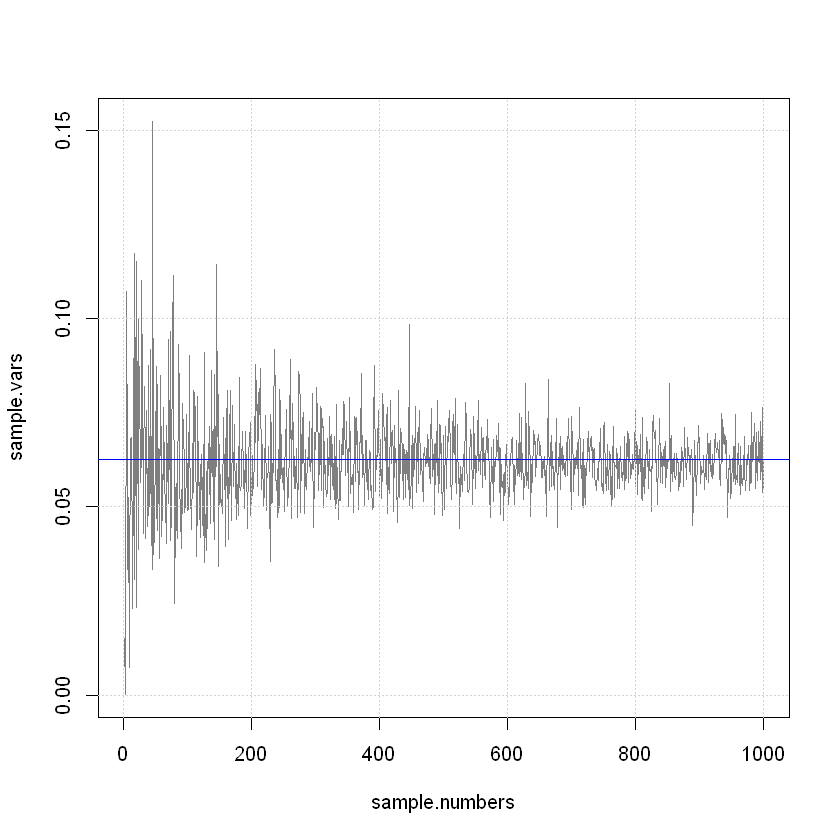

In [8]:
sample.vars <- vector(length = 1000)
sample.numbers <- 1:1000

for (sample.num in sample.numbers) {
    sample.vars[sample.num] <- var(calculate.rvs(sample.num))
}

plot(sample.numbers, sample.vars, type = "l", lty = 1, col = gray(.0, .5))
abline(h = 1/lambda**2, col = "blue")
grid()

Works perfect!